In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv( '../data/data3/ch2_scores_em.csv',
                     index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [4]:
df.count()

english        50
mathematics    50
dtype: int64

In [8]:
eng_sco  = df['english'].values
eng_sco # ndarray객체 반환

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

# 1. 대표값
- 평균값
- 중앙값
- 최빈값

In [9]:
eng_sco.sum() # ndarray 멤버함수

2919

In [10]:
## 평균값
eng_sco.sum()/ len( eng_sco )

58.38

In [14]:
## 중앙값
np.median( eng_sco ) # numpy 멤버 함수

57.5

In [18]:
sorted_scores = np.sort( eng_sco ) # 오름차순으로 정렬

n = len(sorted_scores) # 갯수( 50 개) 
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1] # ndarray 인덱싱 -> arr[1] : 1번째 값
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[ (n+1)//2 - 1 ]
median

57.5

In [22]:
## 최빈값
from scipy.stats import mode

In [30]:
mode([1,1,1,2,2,3])
# 1이 가장 빈도 높은 값, 3번 등장

ModeResult(mode=array([1]), count=array([3]))

In [31]:
print( mode([1,1,1,2,2,3])[0], mode([1,1,1,2,2,3])[1] )

[1] [3]


In [37]:
dt, c = np.unique( [1,1,1,2,2,3] ,return_counts=True ) # numpy함수
# 중복 없이 보여준다
# return_counts = True를 하면 각 개수가 나온다.
for i,j in zip(dt,c):
    if j == c.max():
        print(i,j)

1 3


In [39]:
mode( eng_sco )

ModeResult(mode=array([57], dtype=int64), count=array([5]))

# 2. 산포도
- 편차
    - 개별 데이터 - 평균
- 분산
    - var = ( 개별 데이터 - 평균 )^2.mean()
- 표준편차
    - std = sqart( var )

In [41]:
dt = np.array( [1,2,3,4,5])
dt

array([1, 2, 3, 4, 5])

In [42]:
dt.mean()

3.0

In [65]:
## 편차 : 개별 데이터 - 평균
d = dt - dt.mean()
d

array([-2., -1.,  0.,  1.,  2.])

In [56]:
e = eng_sco - eng_sco.mean()
e

array([-21.38, -21.38, -17.38, -16.38, -16.38, -13.38, -11.38, -11.38,
       -10.38,  -9.38,  -7.38,  -6.38,  -4.38,  -4.38,  -4.38,  -3.38,
        -3.38,  -3.38,  -2.38,  -2.38,  -1.38,  -1.38,  -1.38,  -1.38,
        -1.38,  -0.38,   2.62,   2.62,   3.62,   3.62,   3.62,   4.62,
         5.62,   5.62,   6.62,   6.62,   6.62,   6.62,   7.62,   7.62,
         7.62,   8.62,   9.62,  10.62,  11.62,  11.62,  12.62,  14.62,
        16.62,  20.62])

In [57]:
e.mean()

-2.5579538487363606e-15

In [59]:
## 분산
a = (dt - dt.mean())**2
a.mean()

2.0

In [62]:
dt.var()

2.0

In [63]:
## 표준편차
# 단위를 맞추기 위해 
np.sqrt( dt.var() )

1.4142135623730951

In [64]:
dt.std()

1.4142135623730951

In [68]:
# 편차
eng_sco - eng_sco.mean()

array([-21.38, -21.38, -17.38, -16.38, -16.38, -13.38, -11.38, -11.38,
       -10.38,  -9.38,  -7.38,  -6.38,  -4.38,  -4.38,  -4.38,  -3.38,
        -3.38,  -3.38,  -2.38,  -2.38,  -1.38,  -1.38,  -1.38,  -1.38,
        -1.38,  -0.38,   2.62,   2.62,   3.62,   3.62,   3.62,   4.62,
         5.62,   5.62,   6.62,   6.62,   6.62,   6.62,   7.62,   7.62,
         7.62,   8.62,   9.62,  10.62,  11.62,  11.62,  12.62,  14.62,
        16.62,  20.62])

In [73]:
# 분산
( (eng_sco - eng_sco.mean())**2 ).mean(), eng_sco.var()

(94.11560000000001, 94.11560000000001)

In [74]:
# 표준편차
np.sqrt( ((eng_sco - eng_sco.mean())**2).mean() ) ,eng_sco.std()

(9.70131949788275, 9.70131949788275)

In [79]:
deviation = eng_sco - eng_sco.mean()
summary_df = pd.DataFrame( [eng_sco, deviation])
summary_df = summary_df.T

In [81]:
summary_df['square of deviation'] = np.square( deviation )
summary_df

,0,1,square of deviation
0,37.0,-21.38,457.1044
1,37.0,-21.38,457.1044
2,41.0,-17.38,302.0644
3,42.0,-16.38,268.3044
4,42.0,-16.38,268.3044
5,45.0,-13.38,179.0244
6,47.0,-11.38,129.5044
7,47.0,-11.38,129.5044
8,48.0,-10.38,107.7444
9,49.0,-9.38,87.9844


In [82]:
summary_df['square of deviation'].sum()/ len( summary_df['square of deviation'] )

94.11560000000001

In [ ]:
summary_df['square of deviation'].sum()/ len( summary_df['square of deviation'] )

# *범위
- max - min

In [83]:
eng_sco.max() - eng_sco.min()

42

In [84]:
Q1 = np.percentile( eng_sco, 25 )
Q2 = np.percentile( eng_sco, 50 )
Q3 = np.percentile( eng_sco, 75 )
Q3 - Q1

11.0

# 3. 정규화 
- 평균이 0, 편차 1
- **편차를 표준편차로 나눈 값**
    - 편차/표준편차
- 정규화를 하는 이유
    - 평균이 30점에서 60점인 경우와 평균이 90 점인 경우 60은 평가가 달라야 하므로 표준화 방법이 필요


In [88]:
dt = np.array( [1,2,3,4,5])

In [89]:
dt

array([1, 2, 3, 4, 5])

In [91]:
res = (dt - dt.mean())/dt.std()

In [92]:
res 

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [95]:
res.mean()

0.0

In [96]:
res.std()

0.9999999999999999

In [100]:
eng_sco

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [102]:
# 평균이 0이고 편차가 1인 정규화
(eng_sco - eng_sco.mean()) / eng_sco.std()

array([-2.20382392, -2.20382392, -1.79150888, -1.68843012, -1.68843012,
       -1.37919383, -1.17303631, -1.17303631, -1.06995755, -0.96687878,
       -0.76072126, -0.6576425 , -0.45148498, -0.45148498, -0.45148498,
       -0.34840621, -0.34840621, -0.34840621, -0.24532745, -0.24532745,
       -0.14224869, -0.14224869, -0.14224869, -0.14224869, -0.14224869,
       -0.03916993,  0.27006636,  0.27006636,  0.37314512,  0.37314512,
        0.37314512,  0.47622388,  0.57930264,  0.57930264,  0.6823814 ,
        0.6823814 ,  0.6823814 ,  0.6823814 ,  0.78546016,  0.78546016,
        0.78546016,  0.88853893,  0.99161769,  1.09469645,  1.19777521,
        1.19777521,  1.30085397,  1.5070115 ,  1.71316902,  2.12548406])

### Q. 평균이 50이고 편차가 10이 되도록 정규화

In [113]:
# 평균이 50이고 편차가 10인 정규화
z = 50 + 10*(eng_sco - eng_sco.mean()) / eng_sco.std()
z

array([27.96176076, 27.96176076, 32.08491123, 33.11569885, 33.11569885,
       36.20806169, 38.26963693, 38.26963693, 39.30042454, 40.33121216,
       42.39278739, 43.42357501, 45.48515024, 45.48515024, 45.48515024,
       46.51593786, 46.51593786, 46.51593786, 47.54672547, 47.54672547,
       48.57751309, 48.57751309, 48.57751309, 48.57751309, 48.57751309,
       49.60830071, 52.70066355, 52.70066355, 53.73145117, 53.73145117,
       53.73145117, 54.76223879, 55.7930264 , 55.7930264 , 56.82381402,
       56.82381402, 56.82381402, 56.82381402, 57.85460164, 57.85460164,
       57.85460164, 58.88538925, 59.91617687, 60.94696448, 61.9777521 ,
       61.9777521 , 63.00853972, 65.07011495, 67.13169018, 71.25484065])

In [106]:
z.mean() # 평균 50점으로 표준화

50.00000000000001

In [105]:
score_df = pd.DataFrame( [eng_sco, z])
score_df = score_df.T
score_df # z가 50보다 높으면 평균보다 높다는 의미다.
# 50점을 기준으로 성적이 어느정도인지 파악할 수 있다

,0,1
0,37.0,27.961761
1,37.0,27.961761
2,41.0,32.084911
3,42.0,33.115699
4,42.0,33.115699
5,45.0,36.208062
6,47.0,38.269637
7,47.0,38.269637
8,48.0,39.300425
9,49.0,40.331212


# 4. 도수
- np.histogram()
- pd.cut()
- plt.hist()

### np.historam 의 범위

0  <= r  < 10 <br>
10 <= r  < 20 <br>
20 <= r  < 30 <br>
...<br>
90 <= r  <= 100<br>


In [118]:
s =[ 9, 10, 18,  20, 30, 45,47, 90, 100]
np.histogram( s , bins=10 ) # 가장 작은값에서 가장 큰값을 10등분

(array([3, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]))

In [119]:
s =[ 9, 10, 18,  20, 30, 45,47, 90, 100]
np.histogram( s , bins=10, range=(0,100) ) # 0~100을 10등분

(array([1, 2, 1, 1, 2, 0, 0, 0, 0, 2], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

### pd.cut 범위
0 < r <=10 <br>
10< r <=20 <br>
20< r <=30 <br>
... <br>
90< r <=100<br>


**주의! numpy histogram과 pd.cut의 범위가 다르다**


In [121]:
sr = pd.Series( s )
sr

0      9
1     10
2     18
3     20
4     30
5     45
6     47
7     90
8    100
dtype: int64

In [133]:
pd.cut( sr, bins=range(0,101,10) ).value_counts().sort_index()

(0, 10]      2
(10, 20]     2
(20, 30]     1
(30, 40]     0
(40, 50]     2
(50, 60]     0
(60, 70]     0
(70, 80]     0
(80, 90]     1
(90, 100]    1
dtype: int64

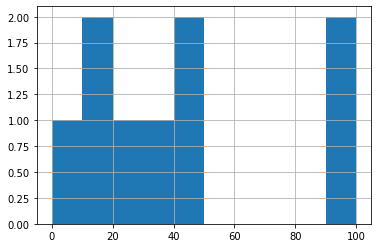

In [127]:
sr.hist(bins=range(0,101,10)) #0부터 100점까지를 10등분

# 도수분포표 그리기

## 도수, 계급

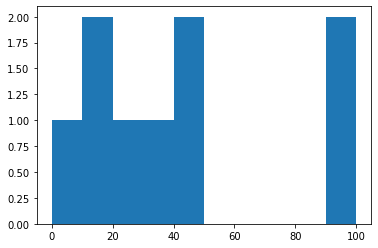

도수 [1. 2. 1. 1. 2. 0. 0. 0. 0. 2.]
계급 [  0  10  20  30  40  50  60  70  80  90 100]


In [142]:
freq, r, _ = plt.hist( sr , bins=range(0,101,10) ) # 도수와 계급
plt.show()
print('도수',freq) # 이건 numpy histogram값과 동일하다!!
print('계급',r)

In [146]:
freq, r = np.histogram( eng_sco, bins=10, range=(0,100) )
print(freq) # 도수
print(r) # 계급

[ 0  0  0  2  8 16 18  6  0  0]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [149]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=freq_class)
freq_dist_df.index.name = 'class'
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


## 계급 인덱스 설정

In [147]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


## 계급값
- 각계급의 중앙값

In [151]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

## 상대도수
- 각 도수를 도수의 총 합으로 나눈 것

In [154]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

## 누적 상대 도수
- 상대 도수들을 누적하여 더한 도수
- np.cumsum()

In [155]:
cum_rel_freq = np.cumsum( rel_freq )
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [156]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


# 연습문제
- 수학 점수의 도수 분포표를 그리시오

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0.0,5,0.00,0.00
10~20,0.0,15,0.00,0.00
20~30,0.0,25,0.00,0.00
30~40,0.0,35,0.00,0.00
40~50,0.0,45,0.00,0.00
50~60,1.0,55,0.02,0.02
60~70,6.0,65,0.12,0.14
70~80,16.0,75,0.32,0.46
80~90,23.0,85,0.46,0.92


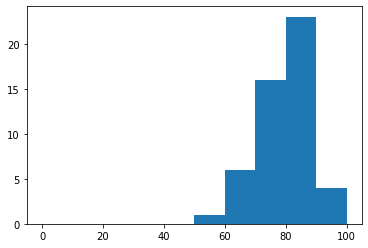

In [3]:
mat = df['mathematics'].values
mat = np.sort(mat)
freq, c, _ = plt.hist( mat , bins=range(0,101,10))
# 도수, 계급

# 상대 도수
rel_freq = freq/freq.sum()

# 누적 상대 도수
cum_rel_freq = np.cumsum( rel_freq )

# 계급값
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]

freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({'frequency':freq },
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq

# freq_dist_df = freq_dist_df[['class value', 'frequency',
#                              'relative frequency', 'cumulative relative frequency']]

freq_dist_df

## 히스토그램과 누적상대도수 그래프 그리기
- 여러 plot 그리기
    - fig 객체 이용하기
        - add_subplot()
        - twinx()
            - Create a twin Axes sharing the xaxis
            - Create a new Axes instance with an invisible x-axis and an independent y-axis positioned opposite to the original one
    

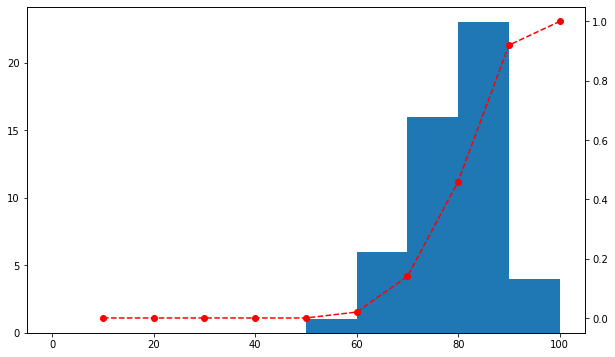

In [17]:
fig = plt.figure( figsize=(10,6) ) # figsize 설정
ax1 = fig.add_subplot()
ax2 = ax1.twinx() # ax1과 x축을 공유하는 y축 생성( ax1의 y축에 반대해서 )
freq, r, _ = ax1.hist(mat, bins=10, range=(0,100)) # ax1에 히스토그램 추가
ax2.plot( r[1:], freq_dist_df['cumulative relative frequency'], 'ro--') # ax2에 누적 상대도수 그래프 추가
plt.show()